# AIFFEL Exploration 10. 카메라 스티커앱 만들기 첫걸음 
## 프로젝트 - 고양이 수염 스티커 만들기

 ## Step 1. 스티커 및 사진 구해서 만들기


 * 패키지 호출

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

 * 이미지 불러오기

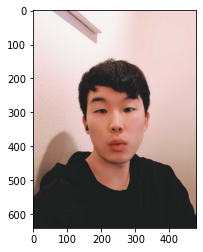

In [49]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/me.jpg'
img_bgr = cv2.imread(my_image_path) # OpenCV로 이미지 읽기, OpecCV는 색상 순서가 Blue/Green/Red
img_bgr = cv2.resize(img_bgr, (480, 640)) # 이미지 크기 변경

# 색 보정 처리(BGR -> RGB)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_show = img_rgb.copy() # 복사본 : boundary box, landmark용
plt.imshow(img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

 
 * 얼굴의 bounding box를 추출

rectangles[[(139, 242) (324, 428)]]


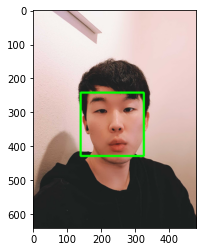

In [12]:
import dlib

# dlib을 활용해 hog detector를 선언
detector_hog = dlib.get_frontal_face_detector() # detector 선언

dlib_rects = detector_hog(img_rgb,1)
# 함수 두번째 파라미터 1은 이미지 피라미드의 수
# 이미지 피라미드 : 이미지를 upsampling 방법을 통해 크기를 키우는 것


print(dlib_rects) # 찾은 얼굴 영역의 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # (0, 255, 0)은 선 색상, 뒤에 3은 두께
    # img_show : 처음에 생성한 이미지 복사본
    
plt.imshow(img_show)
plt.show()

# Step 3. 스티커 적용 위치 확인하기

 * 랜드마크 출력

In [13]:
# 저장한 landmark 모델 불러오기(노션 참조)

import os

# 경로 설정
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환하는 객체
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# dlib_rects : 찾은 얼굴 영역(boundary box)의 좌표 [(a,b), (c,d)]
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    #points.parts() type이 .x, .y 등으로 연산 수행가능한 듯
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


In [19]:
# points

In [20]:
# points.parts()

points[(152, 303), (155, 326), (162, 350), (168, 373), (176, 396), (189, 417), (206, 433), (228, 446), (251, 449), (273, 444), (292, 430), (306, 411), (317, 388), (323, 364), (326, 339), (328, 315), (328, 291), (165, 272), (175, 259), (191, 255), (207, 258), (222, 265), (254, 264), (267, 256), (282, 251), (298, 251), (309, 261), (240, 291), (241, 306), (243, 321), (244, 336), (229, 356), (238, 358), (246, 359), (253, 357), (260, 355), (184, 298), (194, 293), (206, 293), (215, 299), (206, 302), (194, 303), (264, 297), (273, 289), (284, 288), (294, 292), (286, 297), (275, 299), (220, 397), (230, 385), (240, 378), (247, 380), (255, 377), (266, 383), (274, 393), (267, 405), (257, 412), (249, 414), (241, 413), (230, 409), (225, 396), (241, 392), (248, 392), (255, 391), (269, 393), (255, 395), (247, 396), (241, 396)]

In [17]:
# dlib_rects

rectangles[[(139, 242) (324, 428)]]

In [18]:
# dlib_rect

rectangle(139,242,324,428)

In [16]:
# list_points

[(152, 303),
 (155, 326),
 (162, 350),
 (168, 373),
 (176, 396),
 (189, 417),
 (206, 433),
 (228, 446),
 (251, 449),
 (273, 444),
 (292, 430),
 (306, 411),
 (317, 388),
 (323, 364),
 (326, 339),
 (328, 315),
 (328, 291),
 (165, 272),
 (175, 259),
 (191, 255),
 (207, 258),
 (222, 265),
 (254, 264),
 (267, 256),
 (282, 251),
 (298, 251),
 (309, 261),
 (240, 291),
 (241, 306),
 (243, 321),
 (244, 336),
 (229, 356),
 (238, 358),
 (246, 359),
 (253, 357),
 (260, 355),
 (184, 298),
 (194, 293),
 (206, 293),
 (215, 299),
 (206, 302),
 (194, 303),
 (264, 297),
 (273, 289),
 (284, 288),
 (294, 292),
 (286, 297),
 (275, 299),
 (220, 397),
 (230, 385),
 (240, 378),
 (247, 380),
 (255, 377),
 (266, 383),
 (274, 393),
 (267, 405),
 (257, 412),
 (249, 414),
 (241, 413),
 (230, 409),
 (225, 396),
 (241, 392),
 (248, 392),
 (255, 391),
 (269, 393),
 (255, 395),
 (247, 396),
 (241, 396)]

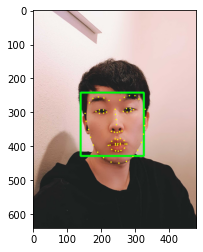

In [44]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

 * 중심(코)의 좌표 확인
 * boundary box 너비, 높이 확인

In [23]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])  # 코 중앙 index = 30
    
    # x, y: 스티커의 위치
    # w, h: boundary box의 가로, 세로 길이
    x = landmark[30][0]
    y = landmark[30][1]- dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
print('(x,y):(%d, %d)'%(x,y))
print('(w,h):(%d, %d)'%(w,h))

(244, 336)
(x,y):(244, 243)
(w,h):(186, 186)


 * 고양이 수염 이미지 읽기

In [28]:
import os

sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print(img_sticker.shape)

(186, 186, 3)


* 이미지의 시작점은 top-left 좌표 이므로, 그에 맞게 x, y 지점 조정

In [50]:
refined_x = x - w//2  # x값을 코 위치에서 bbox너비의 절반 만큼 왼쪽으로 이동
refined_y = y         # y는 그냥 코 위치 유지

print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (151, 243)


 * 만일 x 또는 y의 좌표가 음수로 나올 경우. 이미지 밖으로 나간 것임
 * 이 때에는 음수에 대한 예외 처리를 해주어야 함

## Step 4. 스티커 적용하기

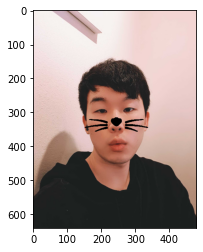

In [52]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #  img_sticker==0 이면, img_sticker값을 갖고, 아니면 sticker_area값을 갖는다.
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Step 5. 문제점 찾아보기

* 얼굴의 각도를 변경 한 후, 재 수행

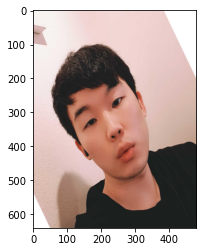

In [86]:
my_image_path_2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/me_2.jpeg'
img_bgr_2 = cv2.imread(my_image_path_2) # OpenCV로 이미지 읽기, OpecCV는 색상 순서가 Blue/Green/Red
img_bgr_2 = cv2.resize(img_bgr_2, (480, 640)) # 이미지 크기 변경

# 색 보정 처리(BGR -> RGB)
img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)

img_show_2 = img_rgb_2.copy() # 복사본 : boundary box, landmark용
plt.imshow(img_rgb_2)
plt.show()

rectangles[[(117, 242) (340, 464)]]


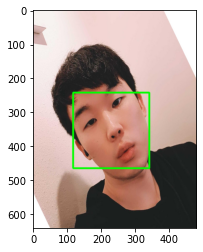

In [87]:
import dlib

# dlib을 활용해 hog detector를 선언
detector_hog_2 = dlib.get_frontal_face_detector() # detector 선언

dlib_rects_2 = detector_hog_2(img_rgb_2,1)
# 함수 두번째 파라미터 1은 이미지 피라미드의 수
# 이미지 피라미드 : 이미지를 upsampling 방법을 통해 크기를 키우는 것


print(dlib_rects_2) # 찾은 얼굴 영역의 좌표

for dlib_rect_2 in dlib_rects_2:
    l = dlib_rect_2.left()
    t = dlib_rect_2.top()
    r = dlib_rect_2.right()
    b = dlib_rect_2.bottom()
    
    cv2.rectangle(img_show_2, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # (0, 255, 0)은 선 색상, 뒤에 3은 두께
    # img_show : 처음에 생성한 이미지 복사본
    
plt.imshow(img_show_2)
plt.show()

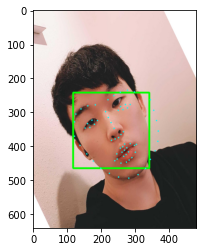

In [88]:
# 저장한 landmark 모델 불러오기(노션 참조)

import os

# 경로 설정
model_path_2 = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환하는 객체
landmark_predictor_2 = dlib.shape_predictor(model_path_2)

list_landmarks_2 = []

# dlib_rects : 찾은 얼굴 영역(boundary box)의 좌표 [(a,b), (c,d)]
for dlib_rect_2 in dlib_rects_2:
    points_2 = landmark_predictor(img_rgb_2, dlib_rect_2)
    list_points_2 = list(map(lambda p: (p.x, p.y), points_2.parts()))
    #points.parts() type이 .x, .y 등으로 연산 수행가능한 듯
    list_landmarks_2.append(list_points_2)
    
for landmark_2 in list_landmarks_2:
    for idx, point_2 in enumerate(list_points_2):
        cv2.circle(img_show_2, point_2, 2, (0, 255, 255), -1) # yellow
        
plt.imshow(img_show_2)
plt.show()

In [89]:
for dlib_rect_2, landmark_2 in zip(dlib_rects_2, list_landmarks_2):
    print(landmark[30])  # 코 중앙 index = 30
    
    # x, y: 스티커의 위치
    # w, h: boundary box의 가로, 세로 길이
    x_2 = landmark_2[30][0]
    y_2 = landmark_2[30][1]- dlib_rect_2.width()//2
    w_2 = dlib_rect_2.width()
    h_2 = dlib_rect_2.width()
print('(x_2,y_2):(%d, %d)'%(x_2,y_2))
print('(w_2,h_2):(%d, %d)'%(w_2,h_2))

(244, 336)
(x_2,y_2):(237, 235)
(w_2,h_2):(224, 224)


In [90]:
import os

sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker_2 = cv2.imread(sticker_path)
img_sticker_2 = cv2.resize(img_sticker_2, (w_2,h_2))

print(img_sticker_2.shape)

(224, 224, 3)


In [91]:
refined_x_2 = x_2 - w_2//2  # x값을 코 위치에서 bbox너비의 절반 만큼 왼쪽으로 이동
refined_y_2 = y_2         # y는 그냥 코 위치 유지

print('(x_2, y_2) : (%d, %d)'%(refined_x_2, refined_y_2))

(x_2, y_2) : (125, 235)


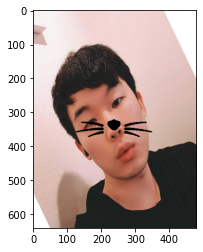

In [92]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area_2 = img_bgr_2[refined_y_2:refined_y_2+img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]

img_bgr_2[refined_y_2:refined_y_2+img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==0,img_sticker_2,sticker_area_2).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB))
plt.show()

    * 얼굴에 손이 닿아 있는 경우

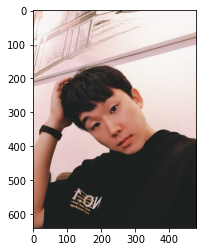

In [94]:
my_image_path_3 = os.getenv('HOME')+'/aiffel/camera_sticker/images/me_3.jpg'
img_bgr_3 = cv2.imread(my_image_path_3) # OpenCV로 이미지 읽기, OpecCV는 색상 순서가 Blue/Green/Red
img_bgr_3 = cv2.resize(img_bgr_3, (480, 640)) # 이미지 크기 변경

# 색 보정 처리(BGR -> RGB)
img_rgb_3 = cv2.cvtColor(img_bgr_3, cv2.COLOR_BGR2RGB)

img_show_3 = img_rgb_3.copy() # 복사본 : boundary box, landmark용
plt.imshow(img_rgb_3)
plt.show()

rectangles[]


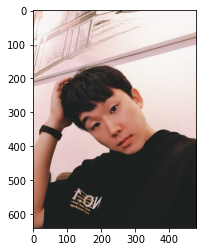

In [95]:
import dlib

# dlib을 활용해 hog detector를 선언
detector_hog_3 = dlib.get_frontal_face_detector() # detector 선언

dlib_rects_3 = detector_hog_3(img_rgb_3,1)
# 함수 두번째 파라미터 1은 이미지 피라미드의 수
# 이미지 피라미드 : 이미지를 upsampling 방법을 통해 크기를 키우는 것


print(dlib_rects_3) # 찾은 얼굴 영역의 좌표

for dlib_rect_3 in dlib_rects_3:
    l = dlib_rect_3.left()
    t = dlib_rect_3.top()
    r = dlib_rect_3.right()
    b = dlib_rect_3.bottom()
    
    cv2.rectangle(img_show_3, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # (0, 255, 0)은 선 색상, 뒤에 3은 두께
    # img_show : 처음에 생성한 이미지 복사본
    
plt.imshow(img_show_3)
plt.show()

=> 머리에 손과 팔이 닿아 있는 경우, face_detector가 얼굴을 제대로 검출하지 못하는 문제가 발생 

# 결론

     * 얼굴의 각도가 x 좌표축에 수평이 아닌 경우, 스티커 이미지가 얼굴 이미지의 각도까지 맞추어 붙여지지 않는 문제가 발생한다.
     * 또한 스티커 이미지의 시작 좌표는 x, y 좌표축에 수평하게 이동하여 지정되므로, 각도가 틀어진 얼굴 이미지 사용 시,
       이 점을 고려하여 스티커 이미지의 시작 지점을 선정해야 한다.
     * 머리에 손과 팔이 닿아 있는 등 이미지에서 얼굴이 주변과 간섭이 있을 경우, face detector가 얼굴을 제대로 검출하지 못하여
       스티커 이미지를 얼굴위에 붙일 수 없는 문제가 발생한다.